In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [159]:
match = pd.read_csv('./Data/Match.csv', index_col=False)
#country = pd.read_csv('./Data/Country.csv', index_col=False)
#team = pd.read_csv('./Data/Team.csv', index_col=False)
#player = pd.read_csv('./Data/Player.csv', index_col=False)
#p_att = pd.read_csv('./Data/Player_Attributes.csv', index_col=False)
#league = pd.read_csv('./Data/League.csv', index_col=False)
#t_att = pd.read_csv('./Data/Team_Attributes.csv', index_col=False)


In [160]:
keep = ['match_api_id','home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
        'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 ]
match = match[keep]

In [161]:
match = match.dropna(how='any')

### Plotting Formations

In [113]:
df = match.copy()
for i in range(11):
    df['home_{}_coord'.format(i+1)] = list(zip(df['home_player_X{}'.format(i+1)], df['home_player_Y{}'.format(i+1)]))     
for i in range(11):
    df['away_{}_coord'.format(i+1)] = list(zip(df['away_player_X{}'.format(i+1)], df['away_player_Y{}'.format(i+1)]))



In [114]:
df_plot= df.iloc[:,-22:]

In [144]:
home = df_plot.iloc[724,:11]
away = df_plot.iloc[724,11:]

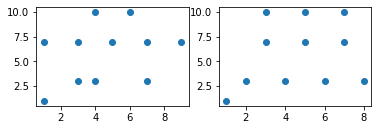

In [145]:
plt.subplot(2, 2, 1)
plt.scatter(*zip(*home))
plt.subplot(2, 2, 2)
plt.scatter(*zip(*away))
plt.show()

### Extracting positions from coordinates (DF/MF/ATT)

In [162]:
## 0:GK, 1:DF, 2:MF, 3:ATT

match['home_{}_position'.format(1)] = 0

for i in range(1,11):
    
    match['home_{}_position'.format(i+1)] = ((match['home_player_Y{}'.format(i+1)] < 4) * 1 +
                                             ((match['home_player_Y{}'.format(i+1)] >= 4) & (match['home_player_Y{}'.format(i+1)] <= 8)) * 2 +
                                            (match['home_player_Y{}'.format(i+1)] >8 ) * 3)

match['away_{}_position'.format(1)] = 0

for i in range(11):
    match['away_{}_position'.format(i+1)] =((match['away_player_Y{}'.format(i+1)] < 4) * 1
                                            + ((match['away_player_Y{}'.format(i+1)] >= 4) & (match['away_player_Y{}'.format(i+1)] <= 8)) * 2 
                                            + (match['away_player_Y{}'.format(i+1)] >8 ) * 3)


In [163]:
df_positions = pd.concat([match['match_api_id'],match.iloc[:,-22:]], axis =1)

In [261]:
a = pd.read_csv('./Data with correct player_atts/x_train.csv').merge(df_positions, how = 'left', on ='match_api_id')
b = pd.read_csv('./Data with correct player_atts/x_val.csv').merge(df_positions, how = 'left', on ='match_api_id')
c = pd.read_csv('./Data with correct player_atts/x_test.csv').merge(df_positions, how = 'left', on ='match_api_id')

In [266]:
c1 = c[['match_api_id', 'home_player_1_overall_rating']]
c1[1] = c1['home_player_1_overall_rating']
c1= c1.drop(columns = ['home_player_1_overall_rating'])
for i in range(1,11):
    c1[i+1] = (c['home_{}_position'.format(i+1)]==1) * c['home_player_{}_overall_rating'.format(i+1)]


C:\Users\Jack.Dai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
